In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('CarPrice_Assignment.csv')

# Understanding the Data

In [2]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [181]:
df.shape

(205, 27)

# Data Preparation

In [5]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
Company_Name=df['CarName'].apply(lambda x: x.split(' ')[0])

In [7]:
df['CompanyName']=Company_Name

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
df.CompanyName=df.CompanyName.str.lower()
def adjust_name(n1,n2):
    df.CompanyName.replace(n1,n2,inplace=True)

adjust_name('maxda','mazda')
adjust_name('porcshce','porsche')
adjust_name('toyouta','toyota')
adjust_name('vokswagen','volkswagen')
adjust_name('vw','volkswagen')
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Visualizing Categorical Data

C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


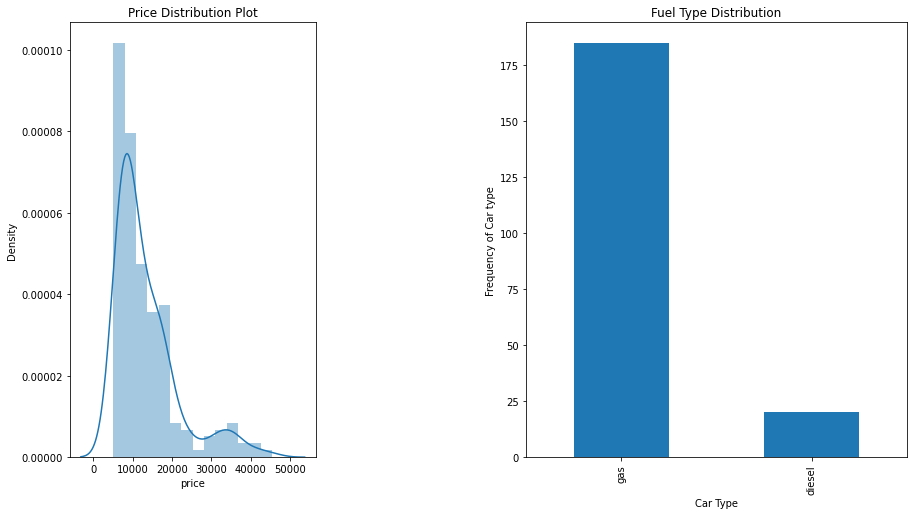

In [11]:

fig=plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

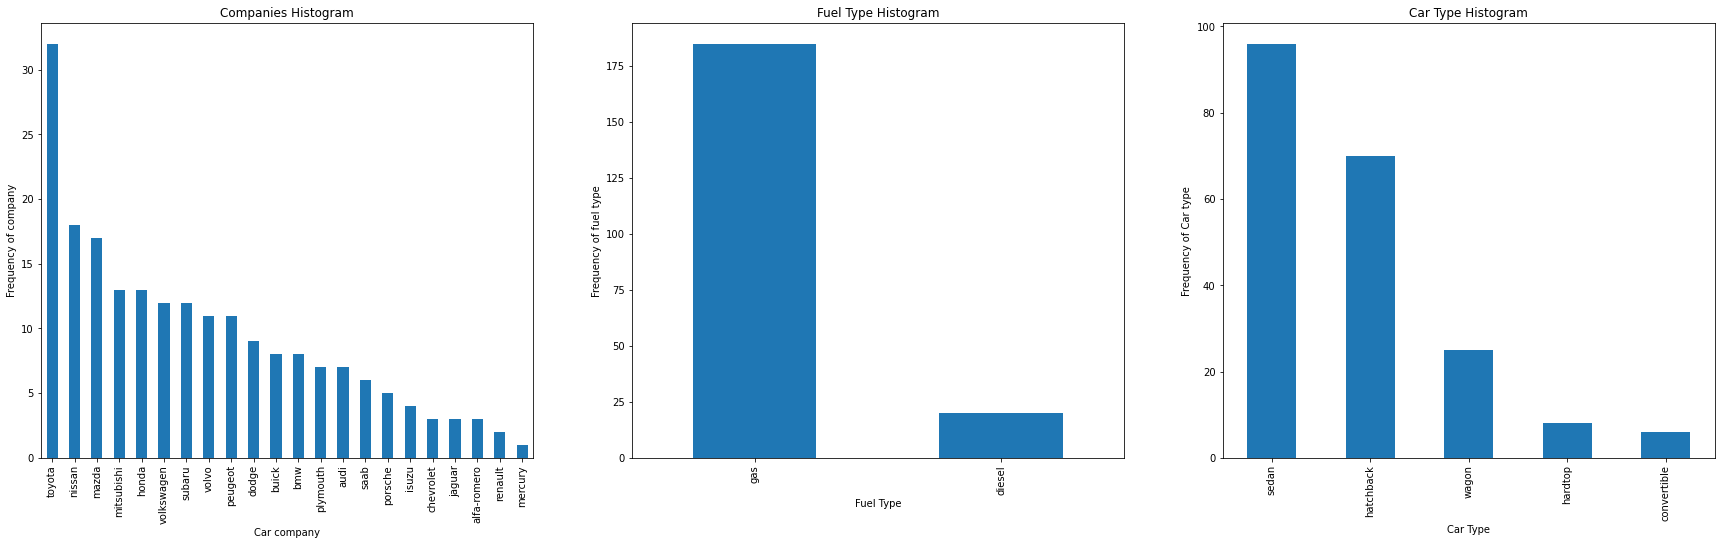

In [12]:
fig=plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type',)

plt.show()

<AxesSubplot:title={'center':'Symboling vs Price'}, xlabel='symboling', ylabel='price'>

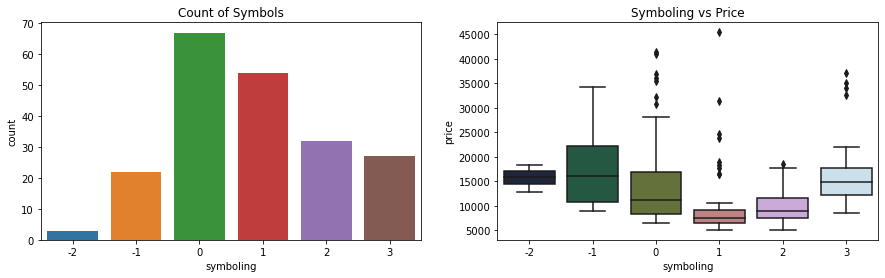

In [13]:
fig=plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Count of Symbols')
sns.countplot(x=df.symboling,data=df)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling,y=df.price,data=df,palette=('cubehelix'))

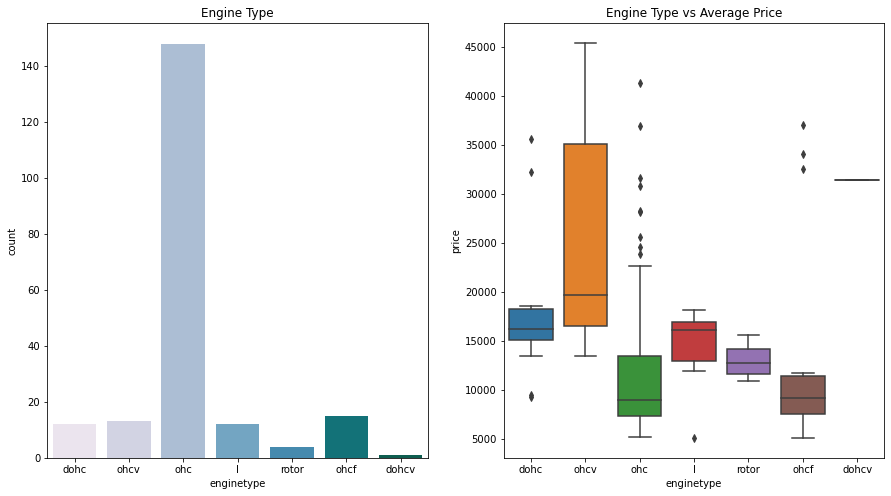

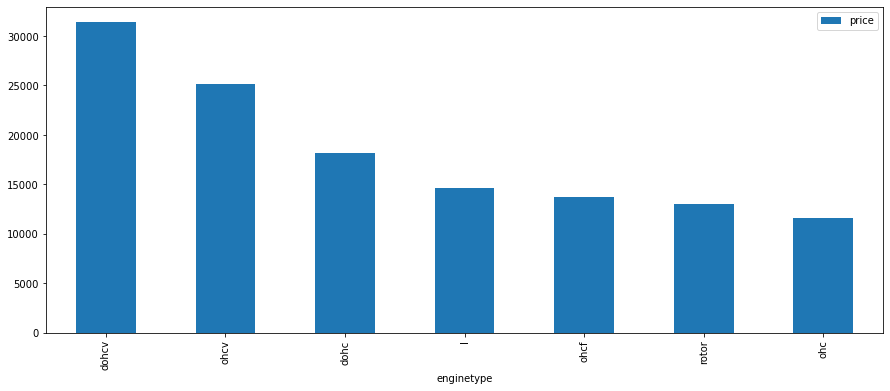

In [14]:
fig=plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(x=df['enginetype'],palette=('PuBuGn'))

plt.subplot(1,2,2)
plt.title(' Engine Type vs Price ')
sns.boxplot(y=df.price,x=df['enginetype'])


plt.title('Engine Type vs Average Price')
appet=pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
appet.plot.bar(figsize=(15,6))

plt.show()

C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ufukk\anaconda3\lib\si

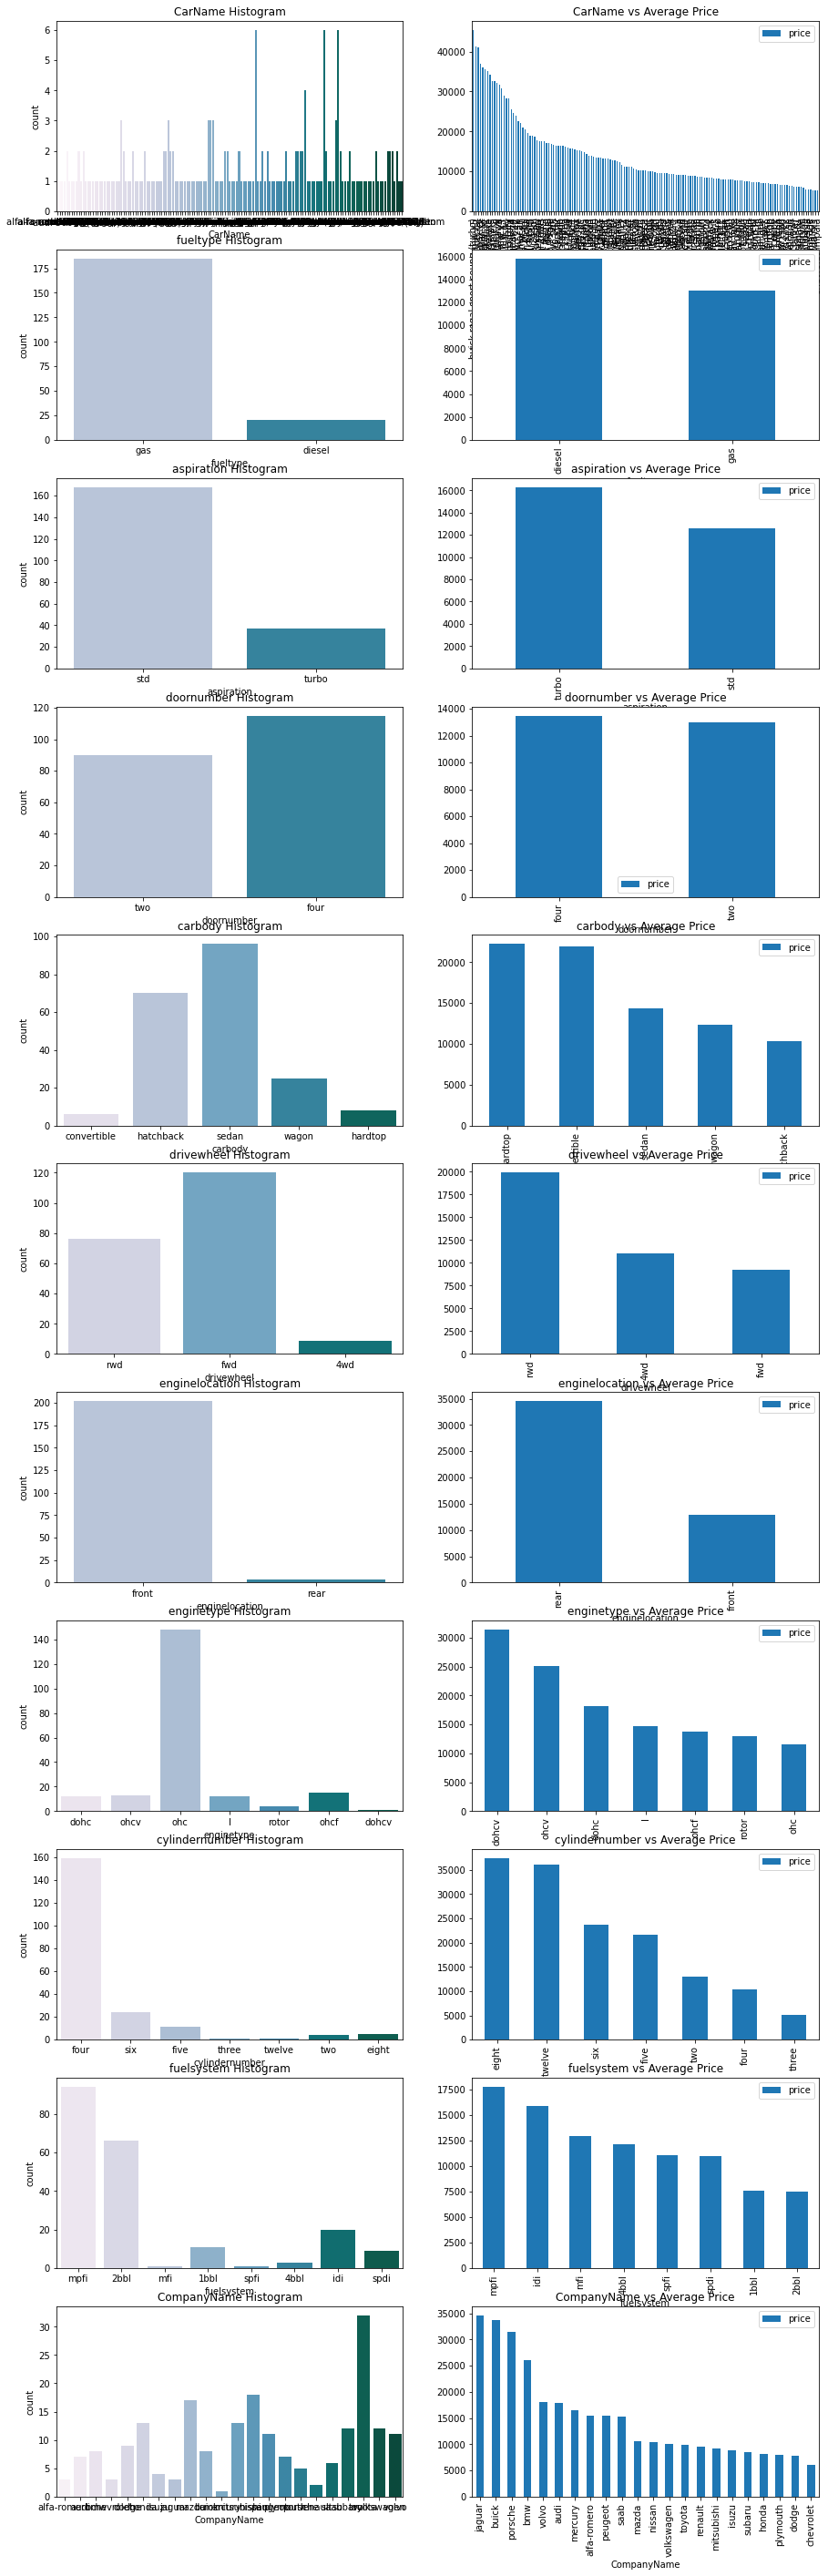

In [16]:
# All categorical columns vs price
fig, ax1=plt.subplots(figsize=(15,50),nrows=11,ncols=2)
ax1=ax1.flatten()
columns=df.select_dtypes(include=['object']).columns
a=0
for i in range(columns.size):
    
    axis=ax1[a]
    axis.set_title(f"{columns[i]} Histogram")
    #plt.title(f"{columns[i]} Histogram",)
    sns.countplot(df[columns[i]],palette=('PuBuGn'),ax=axis)
   
    
    a=a+1
    axis=ax1[a]
    axis.set_title(f"{columns[i]} vs Average Price")
    appet=pd.DataFrame(df.groupby([columns[i]])['price'].mean().sort_values(ascending=False))
    appet.plot.bar(rot=90,ax=axis)
    a=a+1
    
    
plt.show()

# Visualizing Numerical Data

In [17]:
Numerical_columns=df.select_dtypes(exclude=['object']).columns


Numerical_columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ufukk\anacond

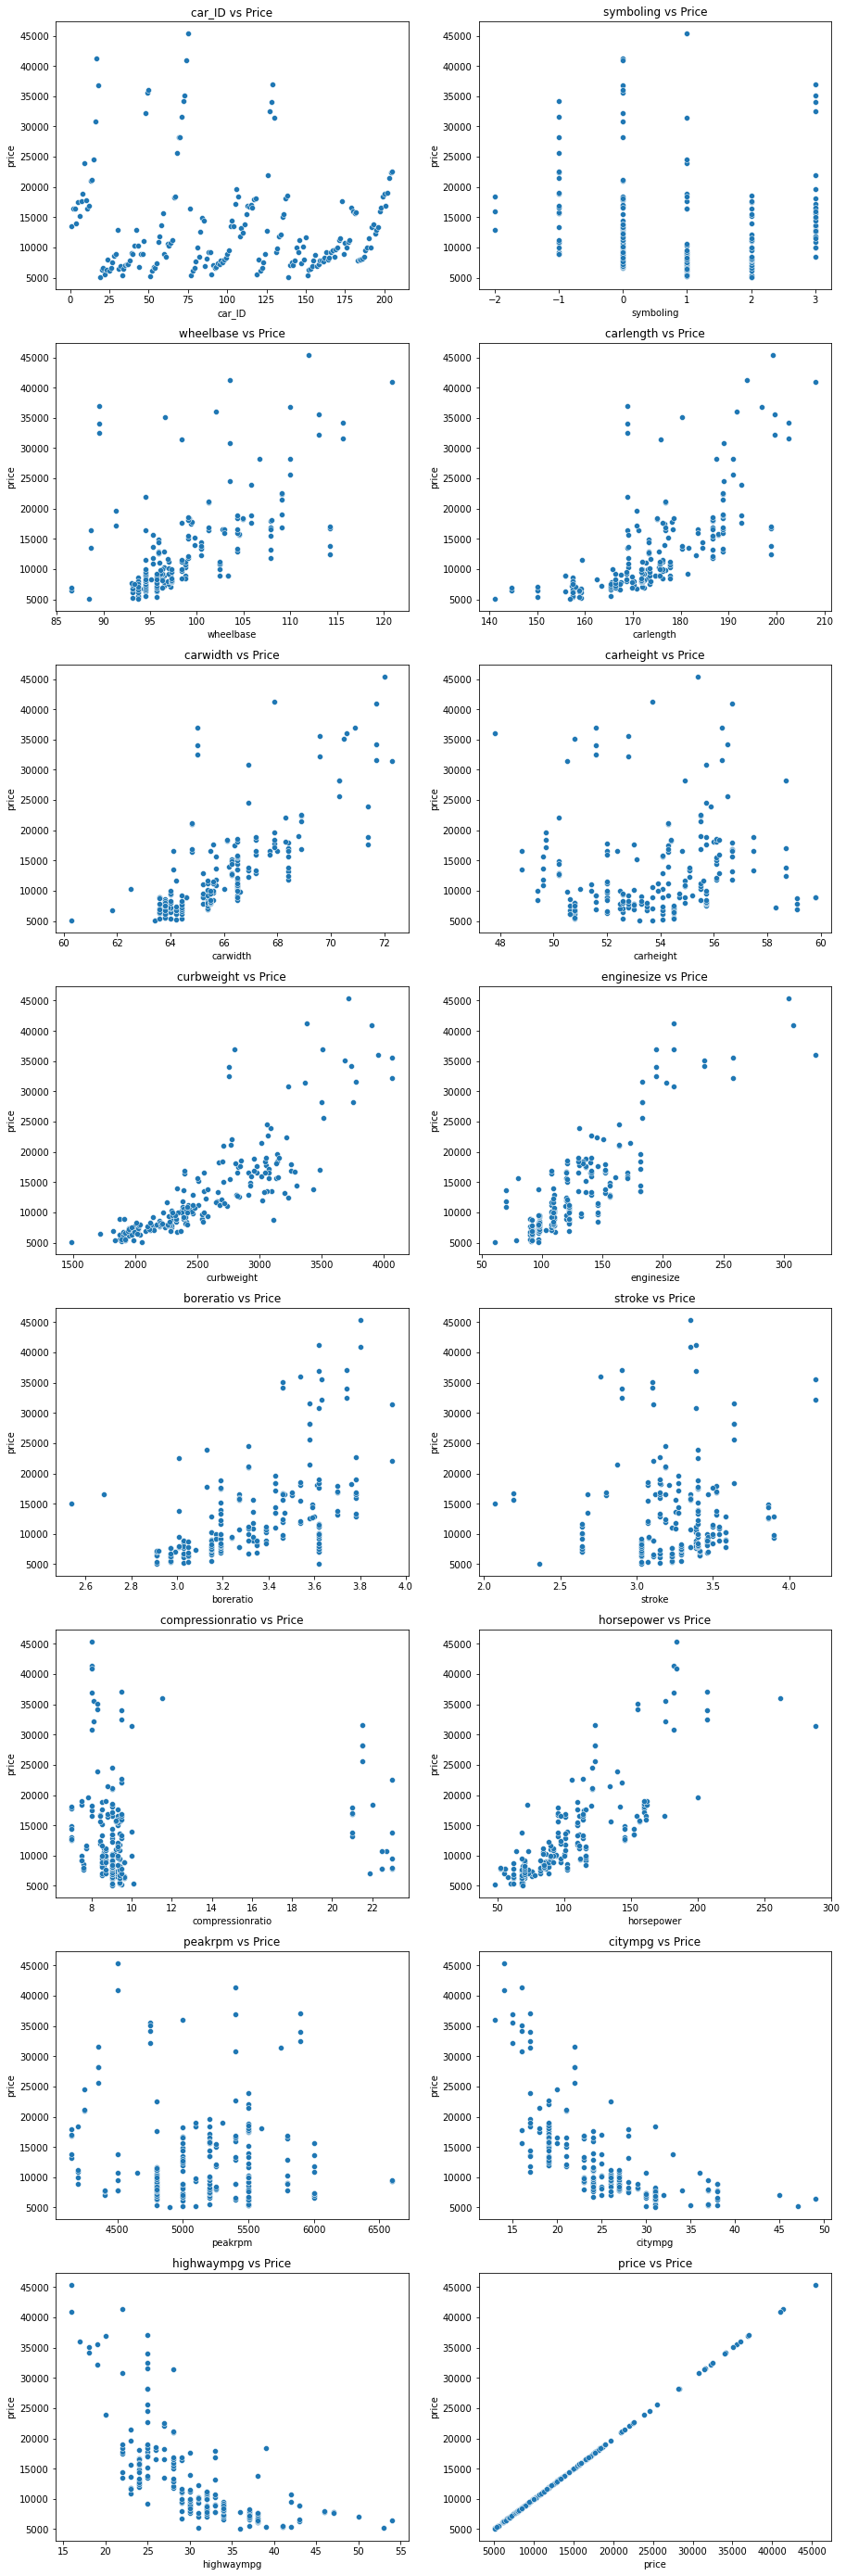

In [18]:
fig,ax1=plt.subplots(int((Numerical_columns.size)/2),2,figsize=(15,50))
ax1=ax1.flatten()
for i in range(Numerical_columns.size):
    
    axis=ax1[i]
    axis.set_title(f"{Numerical_columns[i]} vs Price")
    sns.scatterplot(df[Numerical_columns[i]],df['price'],palette=('PuBuGn'),ax=axis)
    
plt.show()

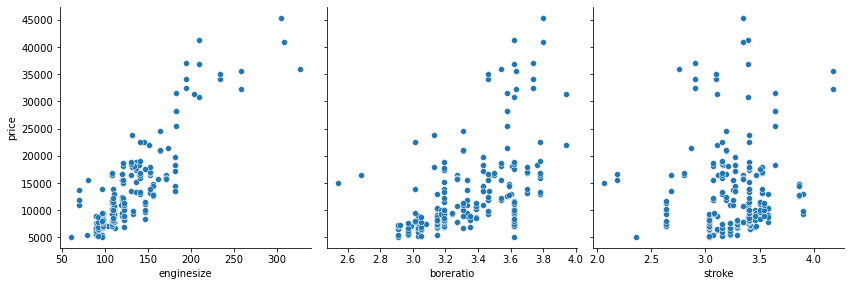

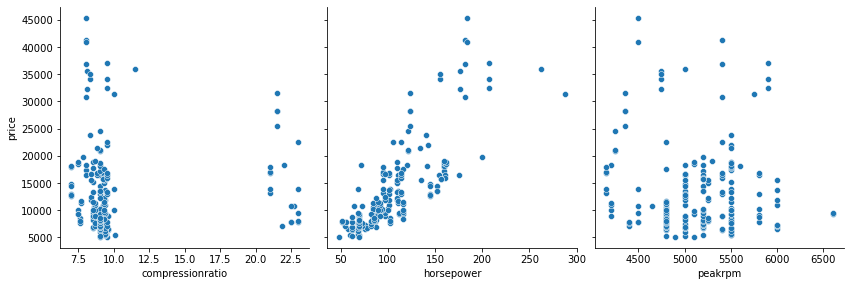

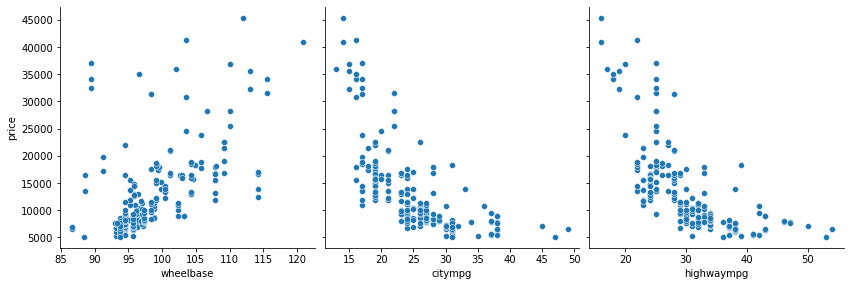

In [19]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars=['price'],height=4,  kind='scatter',diag_kind=None) #diag kind bugu çözüyor
    
pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')
plt.show()

In [20]:
np.corrcoef(df['carlength'],df['carwidth'])[0,1]

0.8411182684818455

# Data Cleaning for ML Model 

In [19]:

df_clean=df.drop(['CarName','CompanyName'],axis=1)
df_clean=pd.get_dummies(df_clean)


In [32]:
df_clean=pd.concat([df_clean,df['price']],axis=1)

In [33]:
df_clean

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,1,0,0,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,1,0,0,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,1,0,0,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,1,0,0,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,1,0,0,0,0,22470.0


# Model Building

In [36]:

from sklearn.model_selection import train_test_split
X=df_clean.iloc[:,:-1].values
y=df_clean.iloc[:,-1].values

In [37]:
X

array([[  1. ,   3. ,  88.6, ...,   1. ,   0. ,   0. ],
       [  2. ,   3. ,  88.6, ...,   1. ,   0. ,   0. ],
       [  3. ,   1. ,  94.5, ...,   1. ,   0. ,   0. ],
       ...,
       [203. ,  -1. , 109.1, ...,   1. ,   0. ,   0. ],
       [204. ,  -1. , 109.1, ...,   0. ,   0. ,   0. ],
       [205. ,  -1. , 109.1, ...,   1. ,   0. ,   0. ]])

In [38]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [76]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=44)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [86]:
y_pred=lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_pred))


0.9290746233450832


In [151]:
from sklearn.feature_selection import RFE
n_features_select=11
rfe=RFE(lm,n_features_to_select=n_features_select)
rfe.fit(X_train,y_train)

ypred2=rfe.predict(X_test)
print(r2_score(y_true=y_test,y_pred=ypred2))
print(rfe.score(X_test,y_test))

0.8607626652046083
0.8607626652046083


In [164]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[(0, False, 6),
 (1, False, 22),
 (2, False, 21),
 (3, False, 17),
 (4, False, 5),
 (5, False, 9),
 (6, True, 1),
 (7, True, 1),
 (8, False, 41),
 (9, False, 2),
 (10, True, 1),
 (11, False, 32),
 (12, True, 1),
 (13, True, 1),
 (14, True, 1),
 (15, True, 1),
 (16, False, 10),
 (17, False, 8),
 (18, False, 16),
 (19, False, 38),
 (20, False, 31),
 (21, False, 12),
 (22, False, 40),
 (23, False, 37),
 (24, False, 23),
 (25, False, 36),
 (26, False, 39),
 (27, False, 28),
 (28, False, 7),
 (29, False, 4),
 (30, False, 14),
 (31, False, 20),
 (32, False, 42),
 (33, False, 19),
 (34, False, 3),
 (35, False, 34),
 (36, True, 1),
 (37, False, 30),
 (38, True, 1),
 (39, False, 11),
 (40, True, 1),
 (41, False, 13),
 (42, False, 24),
 (43, False, 26),
 (44, False, 27),
 (45, False, 33),
 (46, False, 29),
 (47, False, 25),
 (48, True, 1),
 (49, False, 18),
 (50, False, 35),
 (51, False, 15),
 (52, False, 43)]

In [176]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe

,6,7,10,12,13,14,15,36,38,40,48
0,-0.567118,-0.719947,3.244916,-0.683286,1.805116,2.219739,3.041381,-0.260208,-0.158114,0.537874,3.041381
1,0.894159,-0.166277,-0.439775,-0.262960,-0.953012,-0.982764,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
2,-1.185128,-0.840310,-0.237874,1.838671,0.732511,0.472920,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
3,-1.090790,-0.888455,-0.187398,0.787855,0.885740,1.055193,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
4,0.486003,-0.142204,-0.288349,0.787855,-0.953012,-0.691627,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
...,...,...,...,...,...,...,...,...,...,...,...
138,-0.183990,0.122594,-0.364062,-0.052797,-0.340094,0.036215,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
139,-0.328385,-0.118132,-0.389299,-0.683286,0.119594,0.181783,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
140,-0.441975,-0.118132,-0.364062,-1.944265,0.579282,0.472920,-0.328798,-0.260208,-0.158114,0.537874,-0.328798
141,-0.744242,-0.695874,-0.288349,-0.683286,0.579282,0.472920,-0.328798,-0.260208,-0.158114,0.537874,-0.328798


In [179]:
import statsmodels.api as sm
X1=sm.add_constant(X_train_rfe)
lm_ols=sm.OLS(y_train,X1).fit()
lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     90.89
Date:                Sat, 04 Sep 2021   Prob (F-statistic):           3.46e-54
Time:                        22:40:14   Log-Likelihood:                -1334.3
No. Observations:                 143   AIC:                             2691.
Df Residuals:                     132   BIC:                             2723.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04    238.717     55.575      0.000    1.28e+04    1.37e+04
6           2450.4429    698.713      3.507      0.001    1068.319    3832.567
7           4416.4309    560.552      7.879      0.000    3307.603    5525.258
10          -505.0740   1685.790     -0.300      0.765   -3839.733    2829.585
12          1279.8978    322.337      3.971      0.000     642.282    1917.513
13         -1649.4255   1164.175     -1.417      0.159   -3952.280     653.429
14          1593.5074   1161.434      1.372      0.172    -703.925    3890.940
15           582.8162    840.590      0.693      0.489   -1079.955    2245.587
36         -2055.1339    353.173     -5.819      0.000   -2753.745   -1356.523
38          1889.1681    335.856      5.625      0.000    1224.812    2553.525
40         -1909.9120    340.498     -5.609      0.000   -2583.451   -1236.373
48           582.8162    840.590      0.693      0.489   -1079.955    2245.587
==============================================================================
Omnibus:                       13.000   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               35.514
Skew:                           0.166   Prob(JB):                     1.94e-08
Kurtosis:                       5.419   Cond. No.                     1.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""